# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech


- **Nama:** [Rizka Indah Puspita]
- **Email:** [rizkaindahpuspita@gmail.com]
- **Id Dicoding:** [RizkaIP]

- **Proyek** : (Student Performance)

## Persiapan

### Menyiapkan library yang dibutuhkan

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import joblib
import pickle


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve,precision_recall_curve, auc,confusion_matrix, precision_score, recall_score, f1_score

### Menyiapkan data yang akan digunakan

## Data Understanding

### Memuat Dataset

In [37]:
data = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv", sep=";")
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [39]:
data.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


### Menghapus Data Missing Value

In [40]:
data.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Penjelasan:

- Data bersih dan tidak terdapat missing value di dalamnya

### Cek Data Duplicated

In [41]:
data.duplicated().sum()
# Mengecek jika ada duplikasi pada data
print('Jumlah duplikasi : ', data.duplicated().sum())

Jumlah duplikasi :  0


Penjelasan:

- Tidak ada data yang duplikat

In [42]:
data.to_csv("students_performance.csv", index=False)

### EDA

#### Univariate Analysis

In [43]:
# Menampilkan variable data numeric dan categorical
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

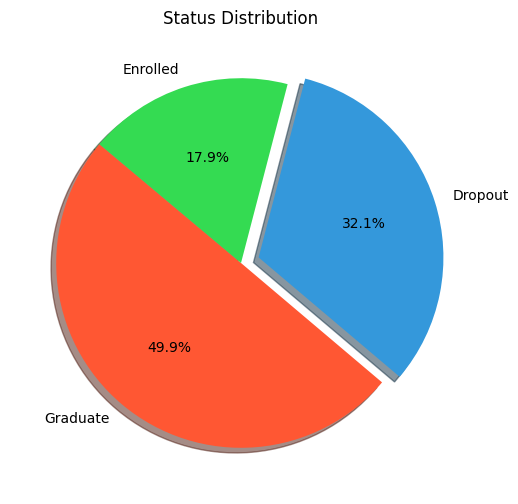

In [44]:
# Hitung jumlah status
status_counts = data['Status'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))
colors = ['#FF5733', '#3498db', '#34db52']  # Added a third color for the additional category
labels = status_counts.index.tolist()
explode = (0, 0.1, 0)  # Added a third value to explode for the additional category

plt.pie(status_counts, labels=labels, autopct='%1.1f%%', colors=colors,
        startangle=140, explode=explode, shadow=True)

plt.title('Status Distribution')
plt.show()

In [45]:
data.shape

(4424, 37)

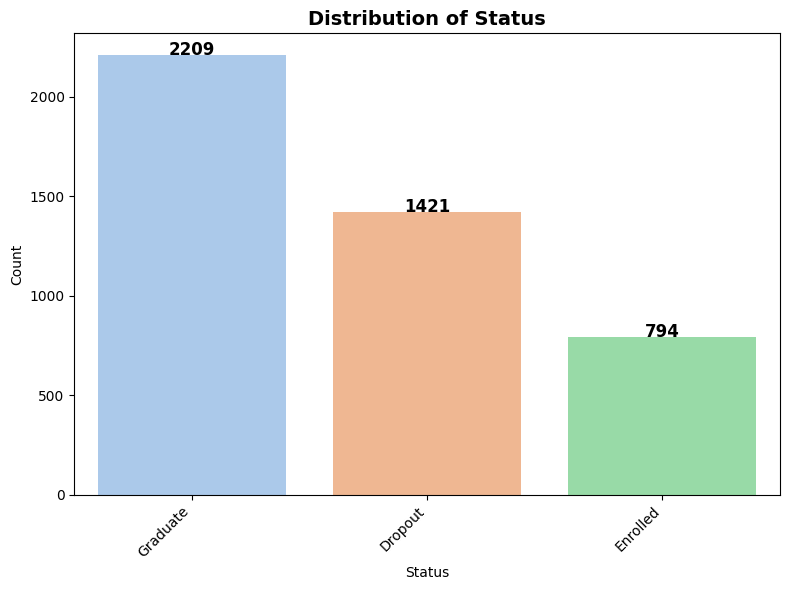

In [46]:
# Menghitung jumlah setiap kategori dalam kolom 'Status'
status_counts = data['Status'].value_counts()

plt.figure(figsize=(8, 6))  # Sesuaikan ukuran grafik

# Membuat plot batang
ax = sns.barplot(x=status_counts.index, y=status_counts.values, palette="pastel")

# Menambahkan angka di atas batang
for i, v in enumerate(status_counts.values):
    ax.text(i, v + 0.2, str(v), ha='center', fontsize=12, fontweight='bold')

plt.title('Distribution of Status', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Memutar label x agar lebih terbaca
plt.ylabel("Count")
plt.xlabel("Status")

plt.tight_layout()
plt.show()

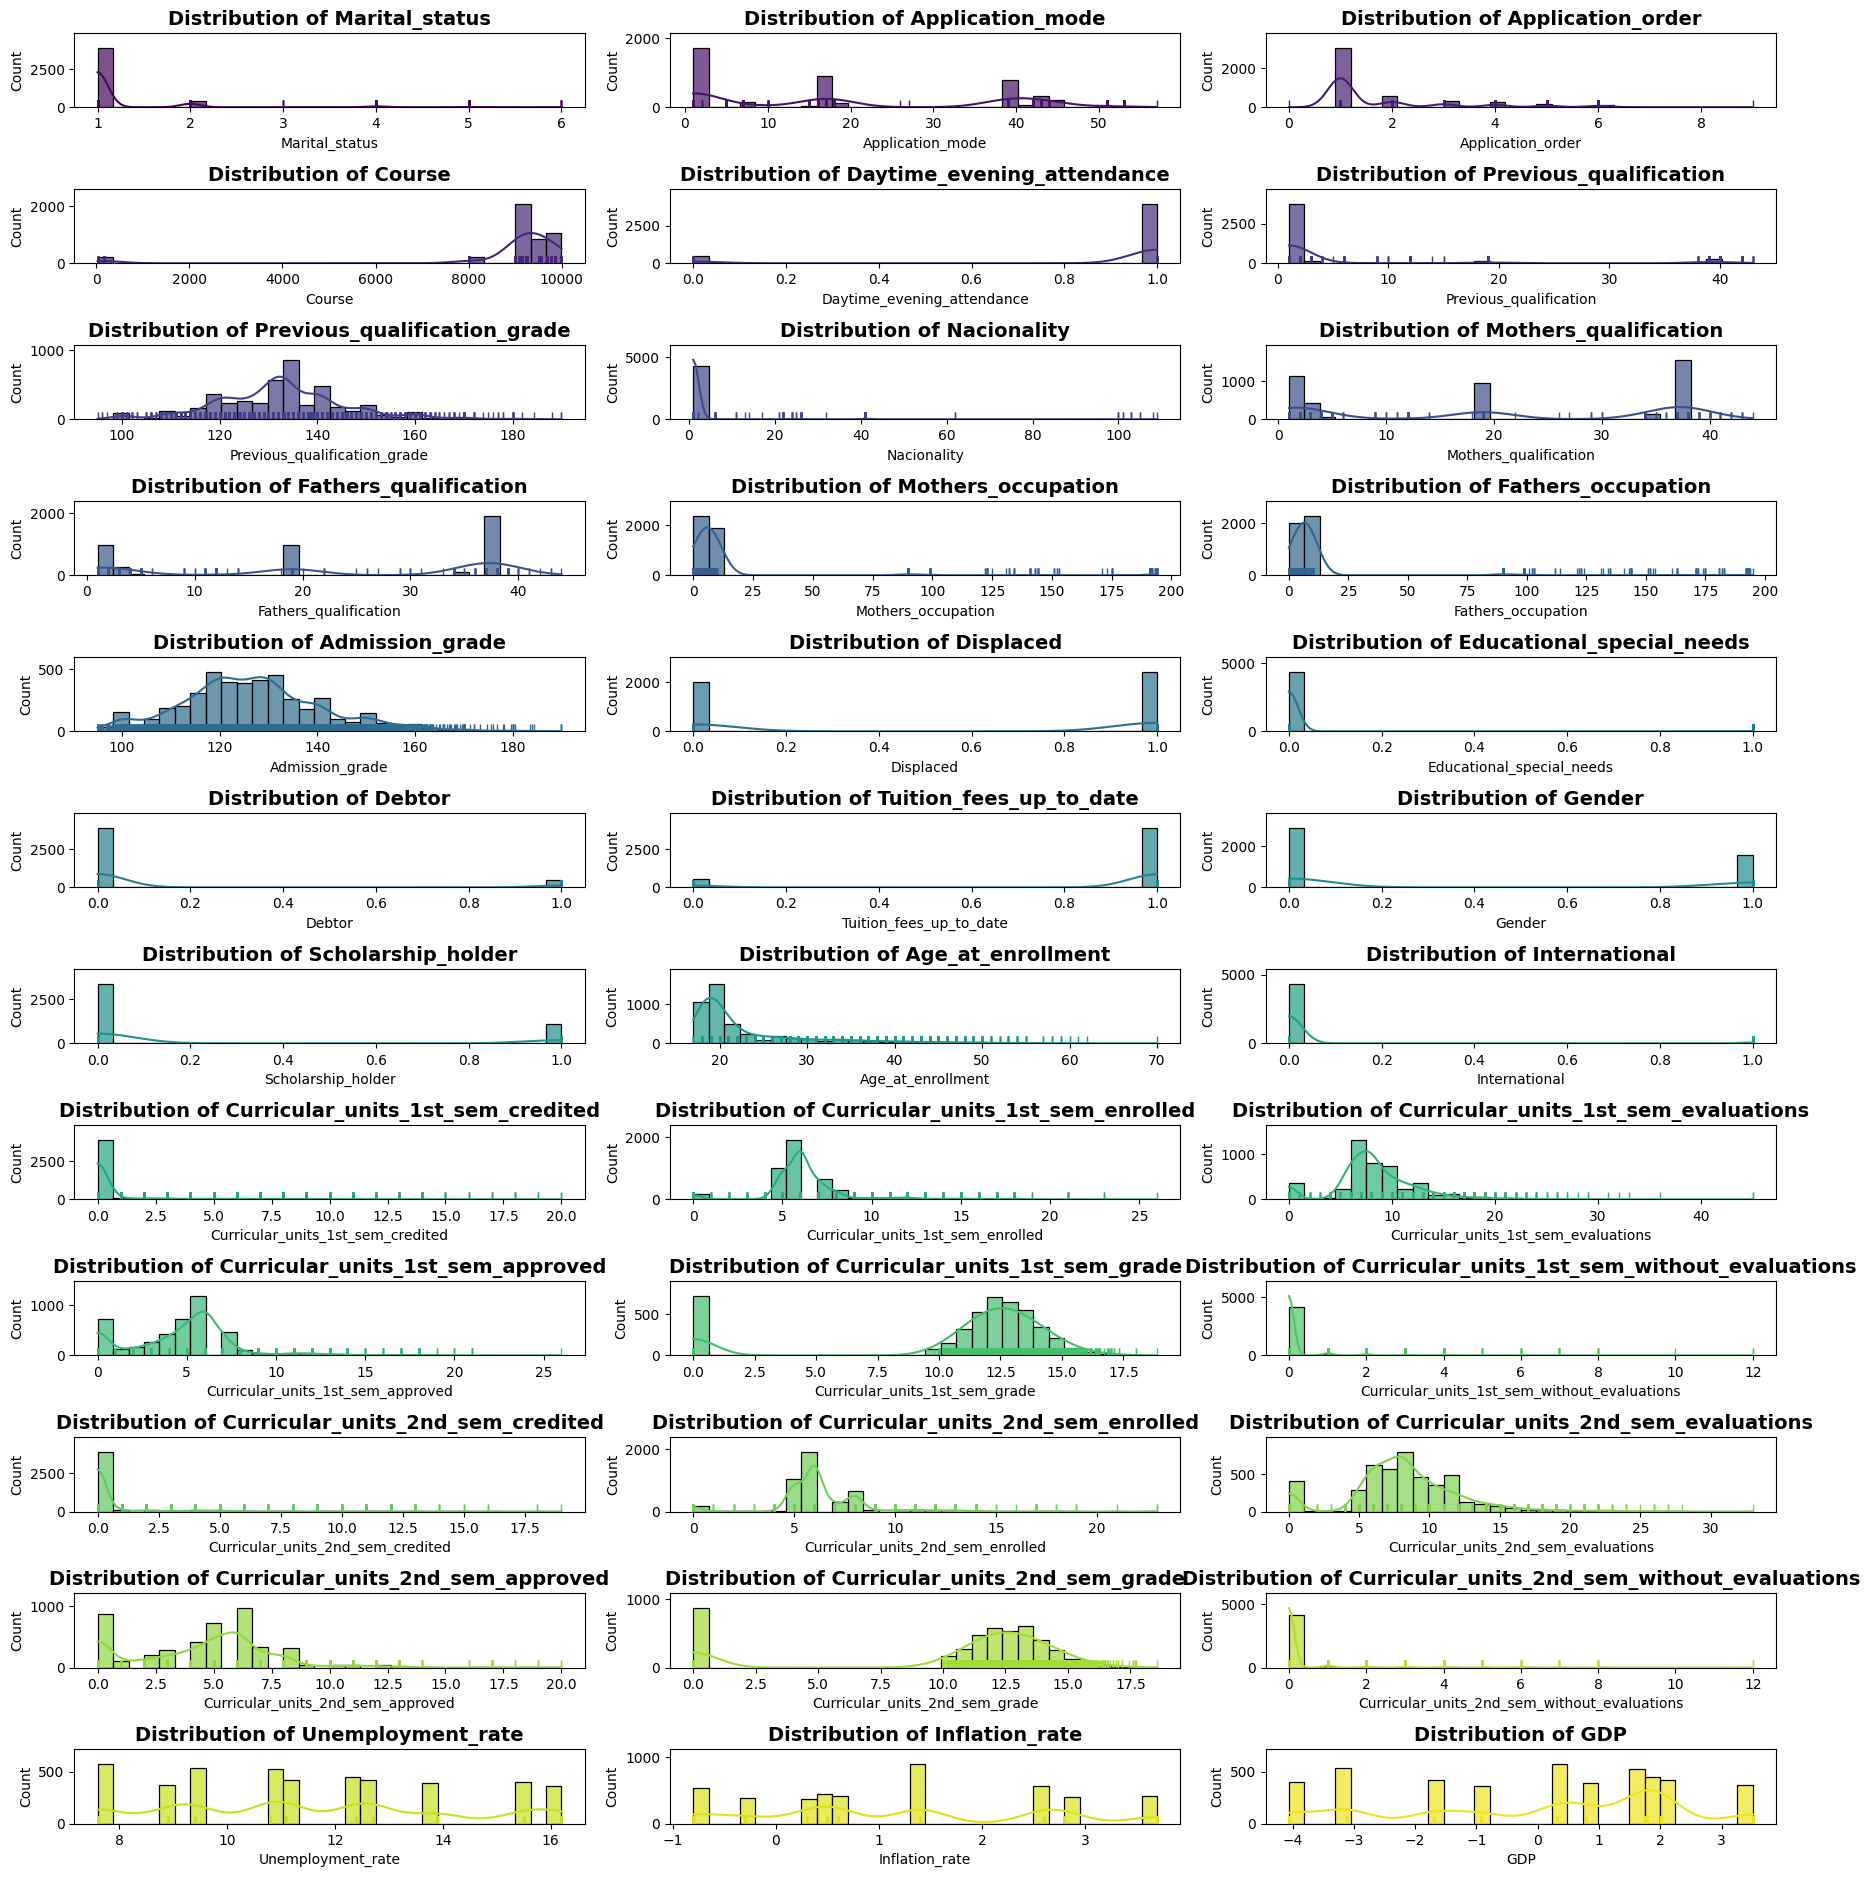

In [47]:
# Univariate analysis untuk numeric variable
plt.figure(figsize=(18, 20))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)

    # Pilih warna dari palet "viridis"
    color = sns.color_palette("viridis", len(numeric_columns))[i-1]

    # Histogram dengan KDE dan rugplot untuk melihat distribusi
    sns.histplot(data[col], kde=True, color=color, bins=30, edgecolor='black', alpha=0.7)
    sns.rugplot(data[col], color=color, height=0.1)  # Tambahkan rugplot di bawah

    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


#### Multivariate Analysis

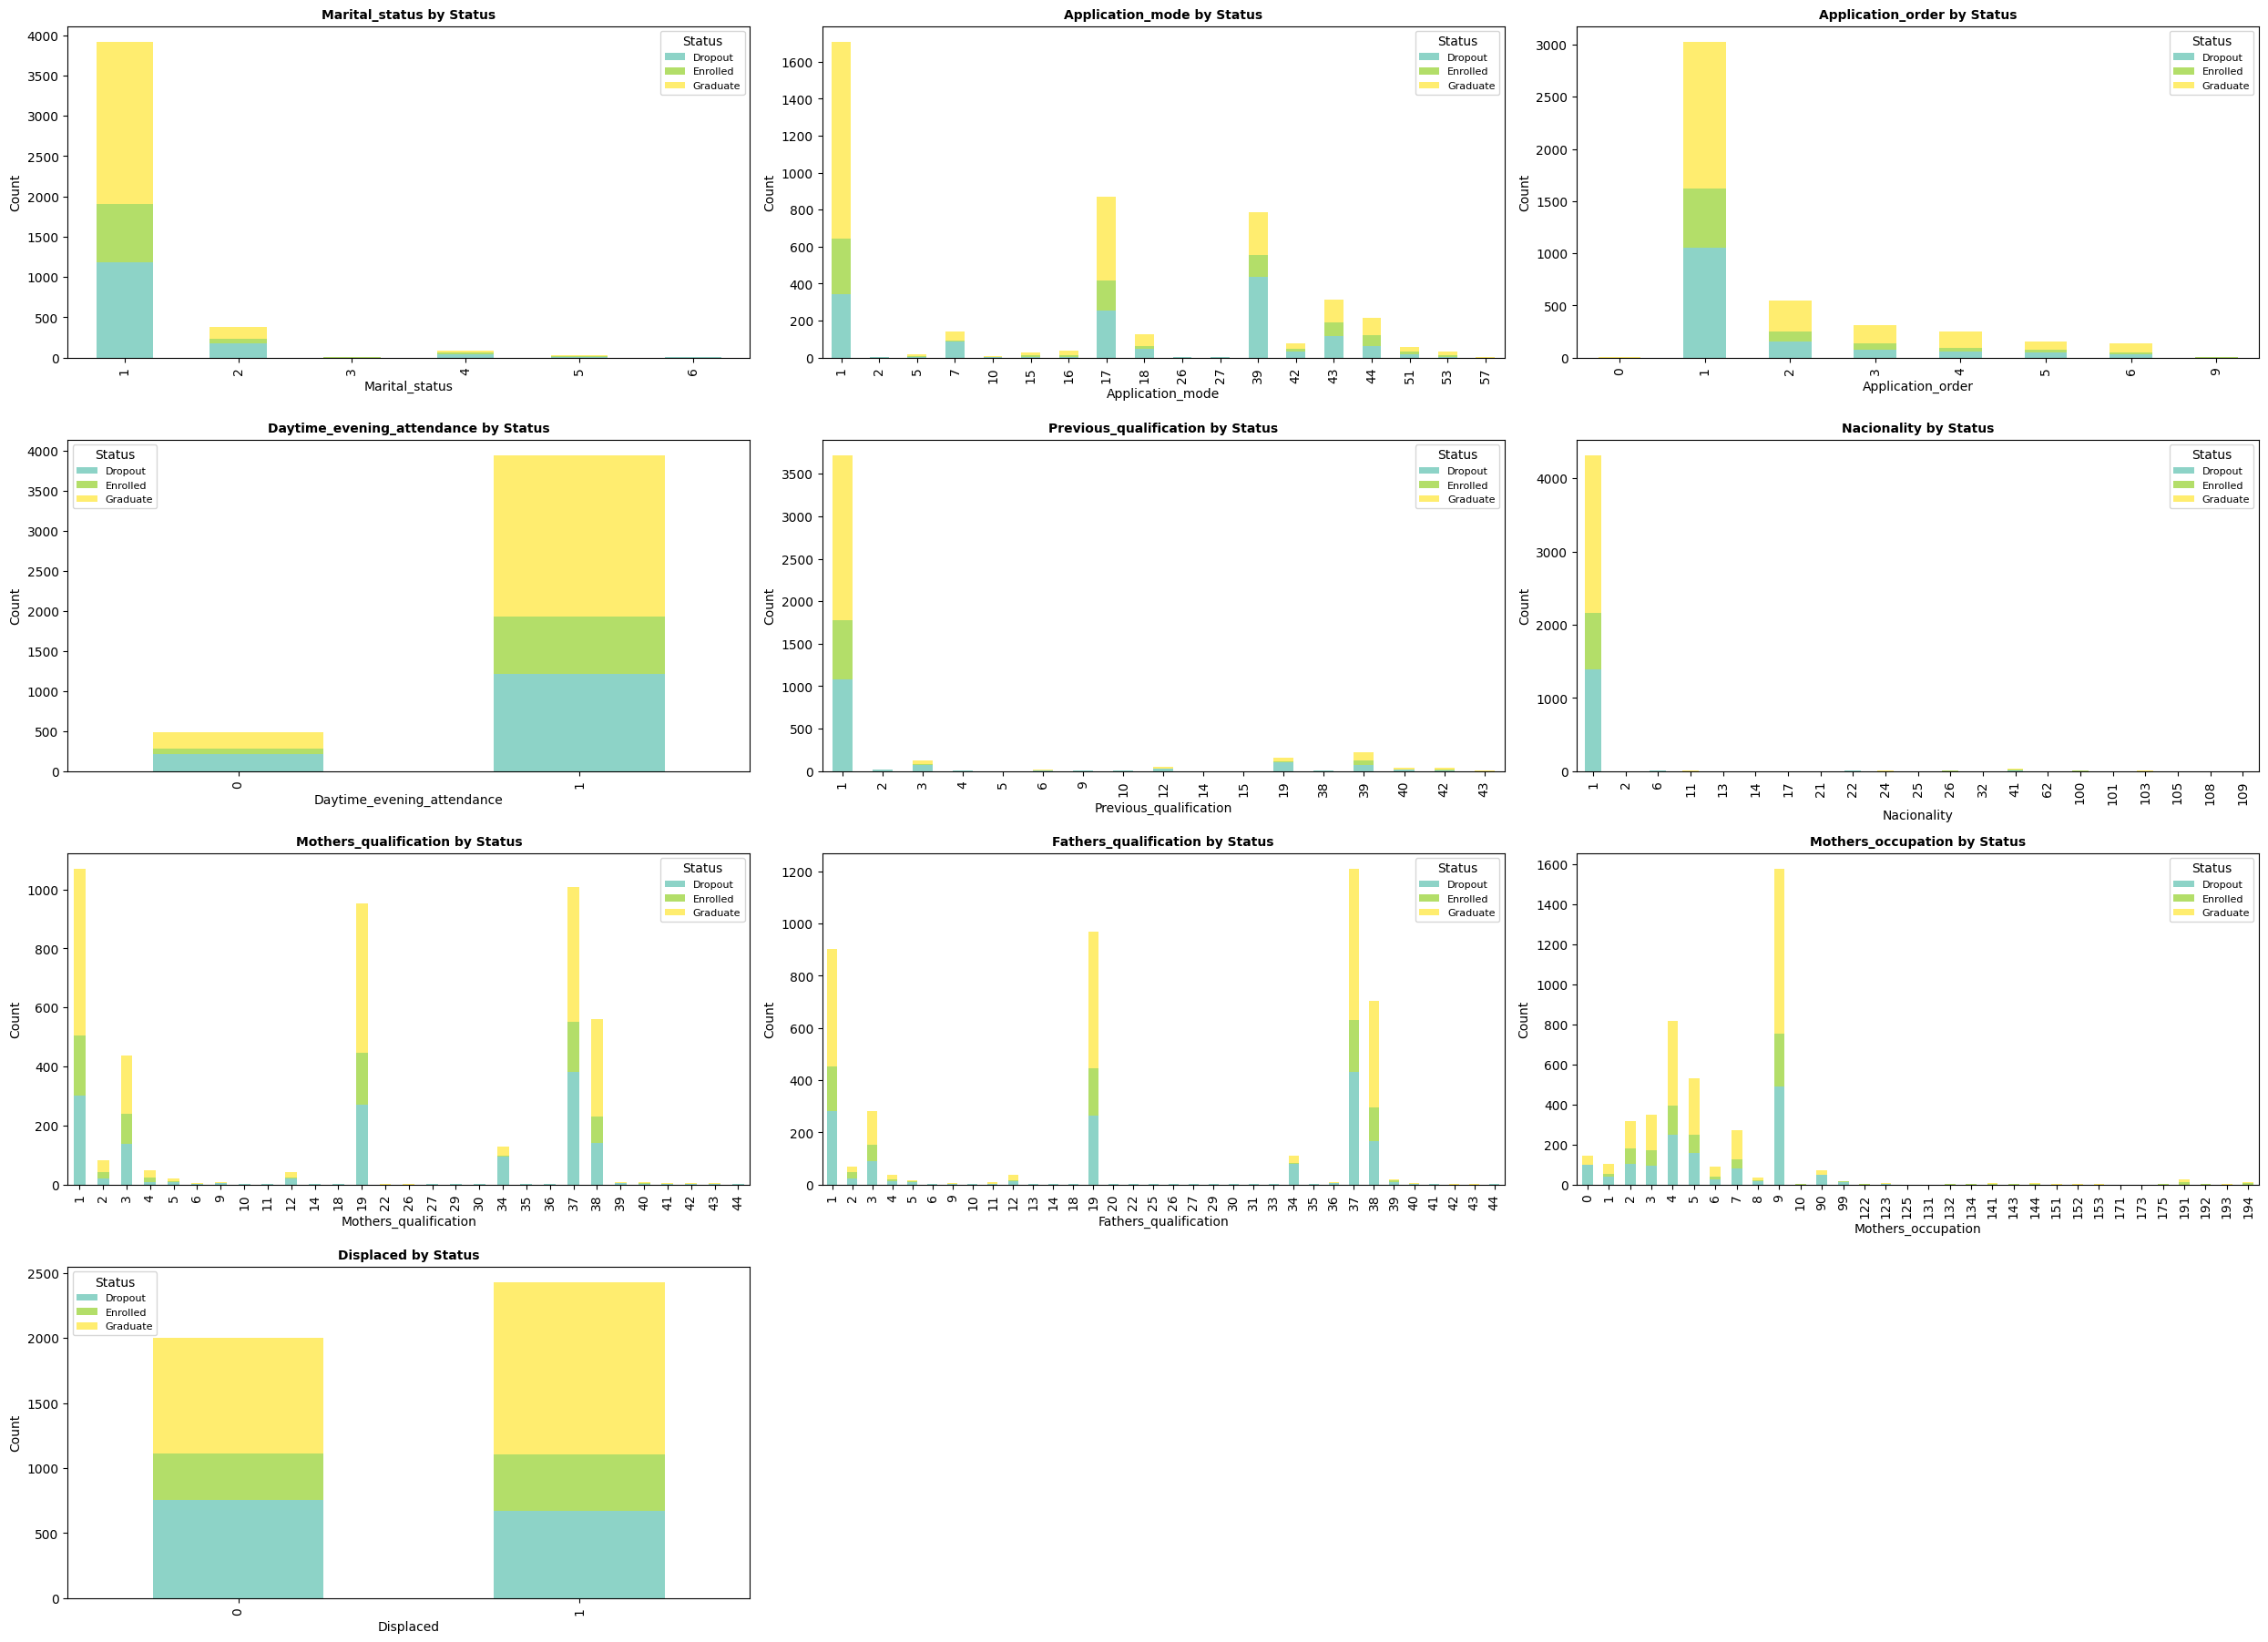

In [48]:
# Pilih fitur yang ingin divisualisasikan
features = ['Marital_status', 'Application_mode', 'Application_order','Daytime_evening_attendance', 'Previous_qualification',
            'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Displaced']

# Tentukan jumlah baris dan kolom
nrows = 10
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 45))  # Lebih besar agar lebih jelas
axes = axes.flatten()  # Flatten supaya lebih mudah diakses

# Loop setiap fitur dan buat plot
for i, feature in enumerate(features):
    ax = axes[i]
    crosstab = pd.crosstab(data[feature], data['Status'])  # Buat tabel pivot

    crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='Set3')

    ax.set_title(f'{feature} by Status', fontsize=10, fontweight='bold')
    ax.set_ylabel('Count')
    ax.set_xlabel(feature)
    ax.legend(title='Status', fontsize=8)

# Hapus subplot kosong jika fitur tidak habis dalam grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

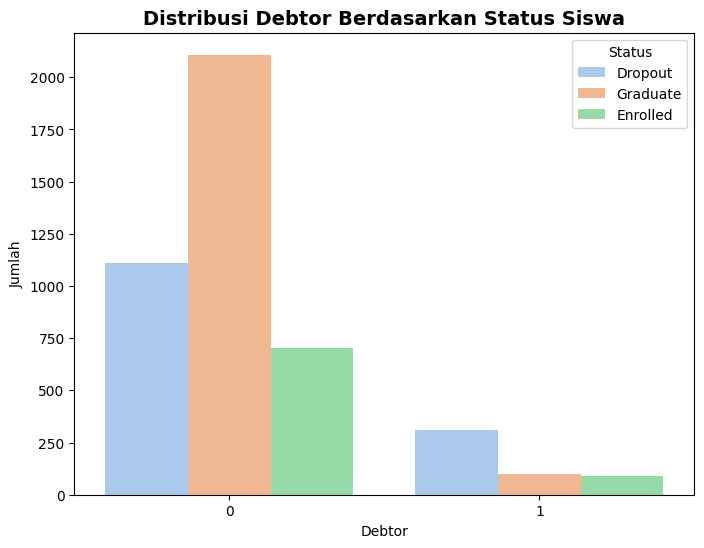

In [49]:
# Membuat pivot table antara Debtor dan Status
plt.figure(figsize=(8, 6))  # Menyesuaikan ukuran gambar
sns.countplot(data=data, x="Debtor", hue="Status", palette="pastel")

plt.title('Distribusi Debtor Berdasarkan Status Siswa', fontsize=14, fontweight='bold')
plt.xlabel('Debtor')
plt.ylabel('Jumlah')
plt.legend(title="Status", loc="upper right")

plt.show()

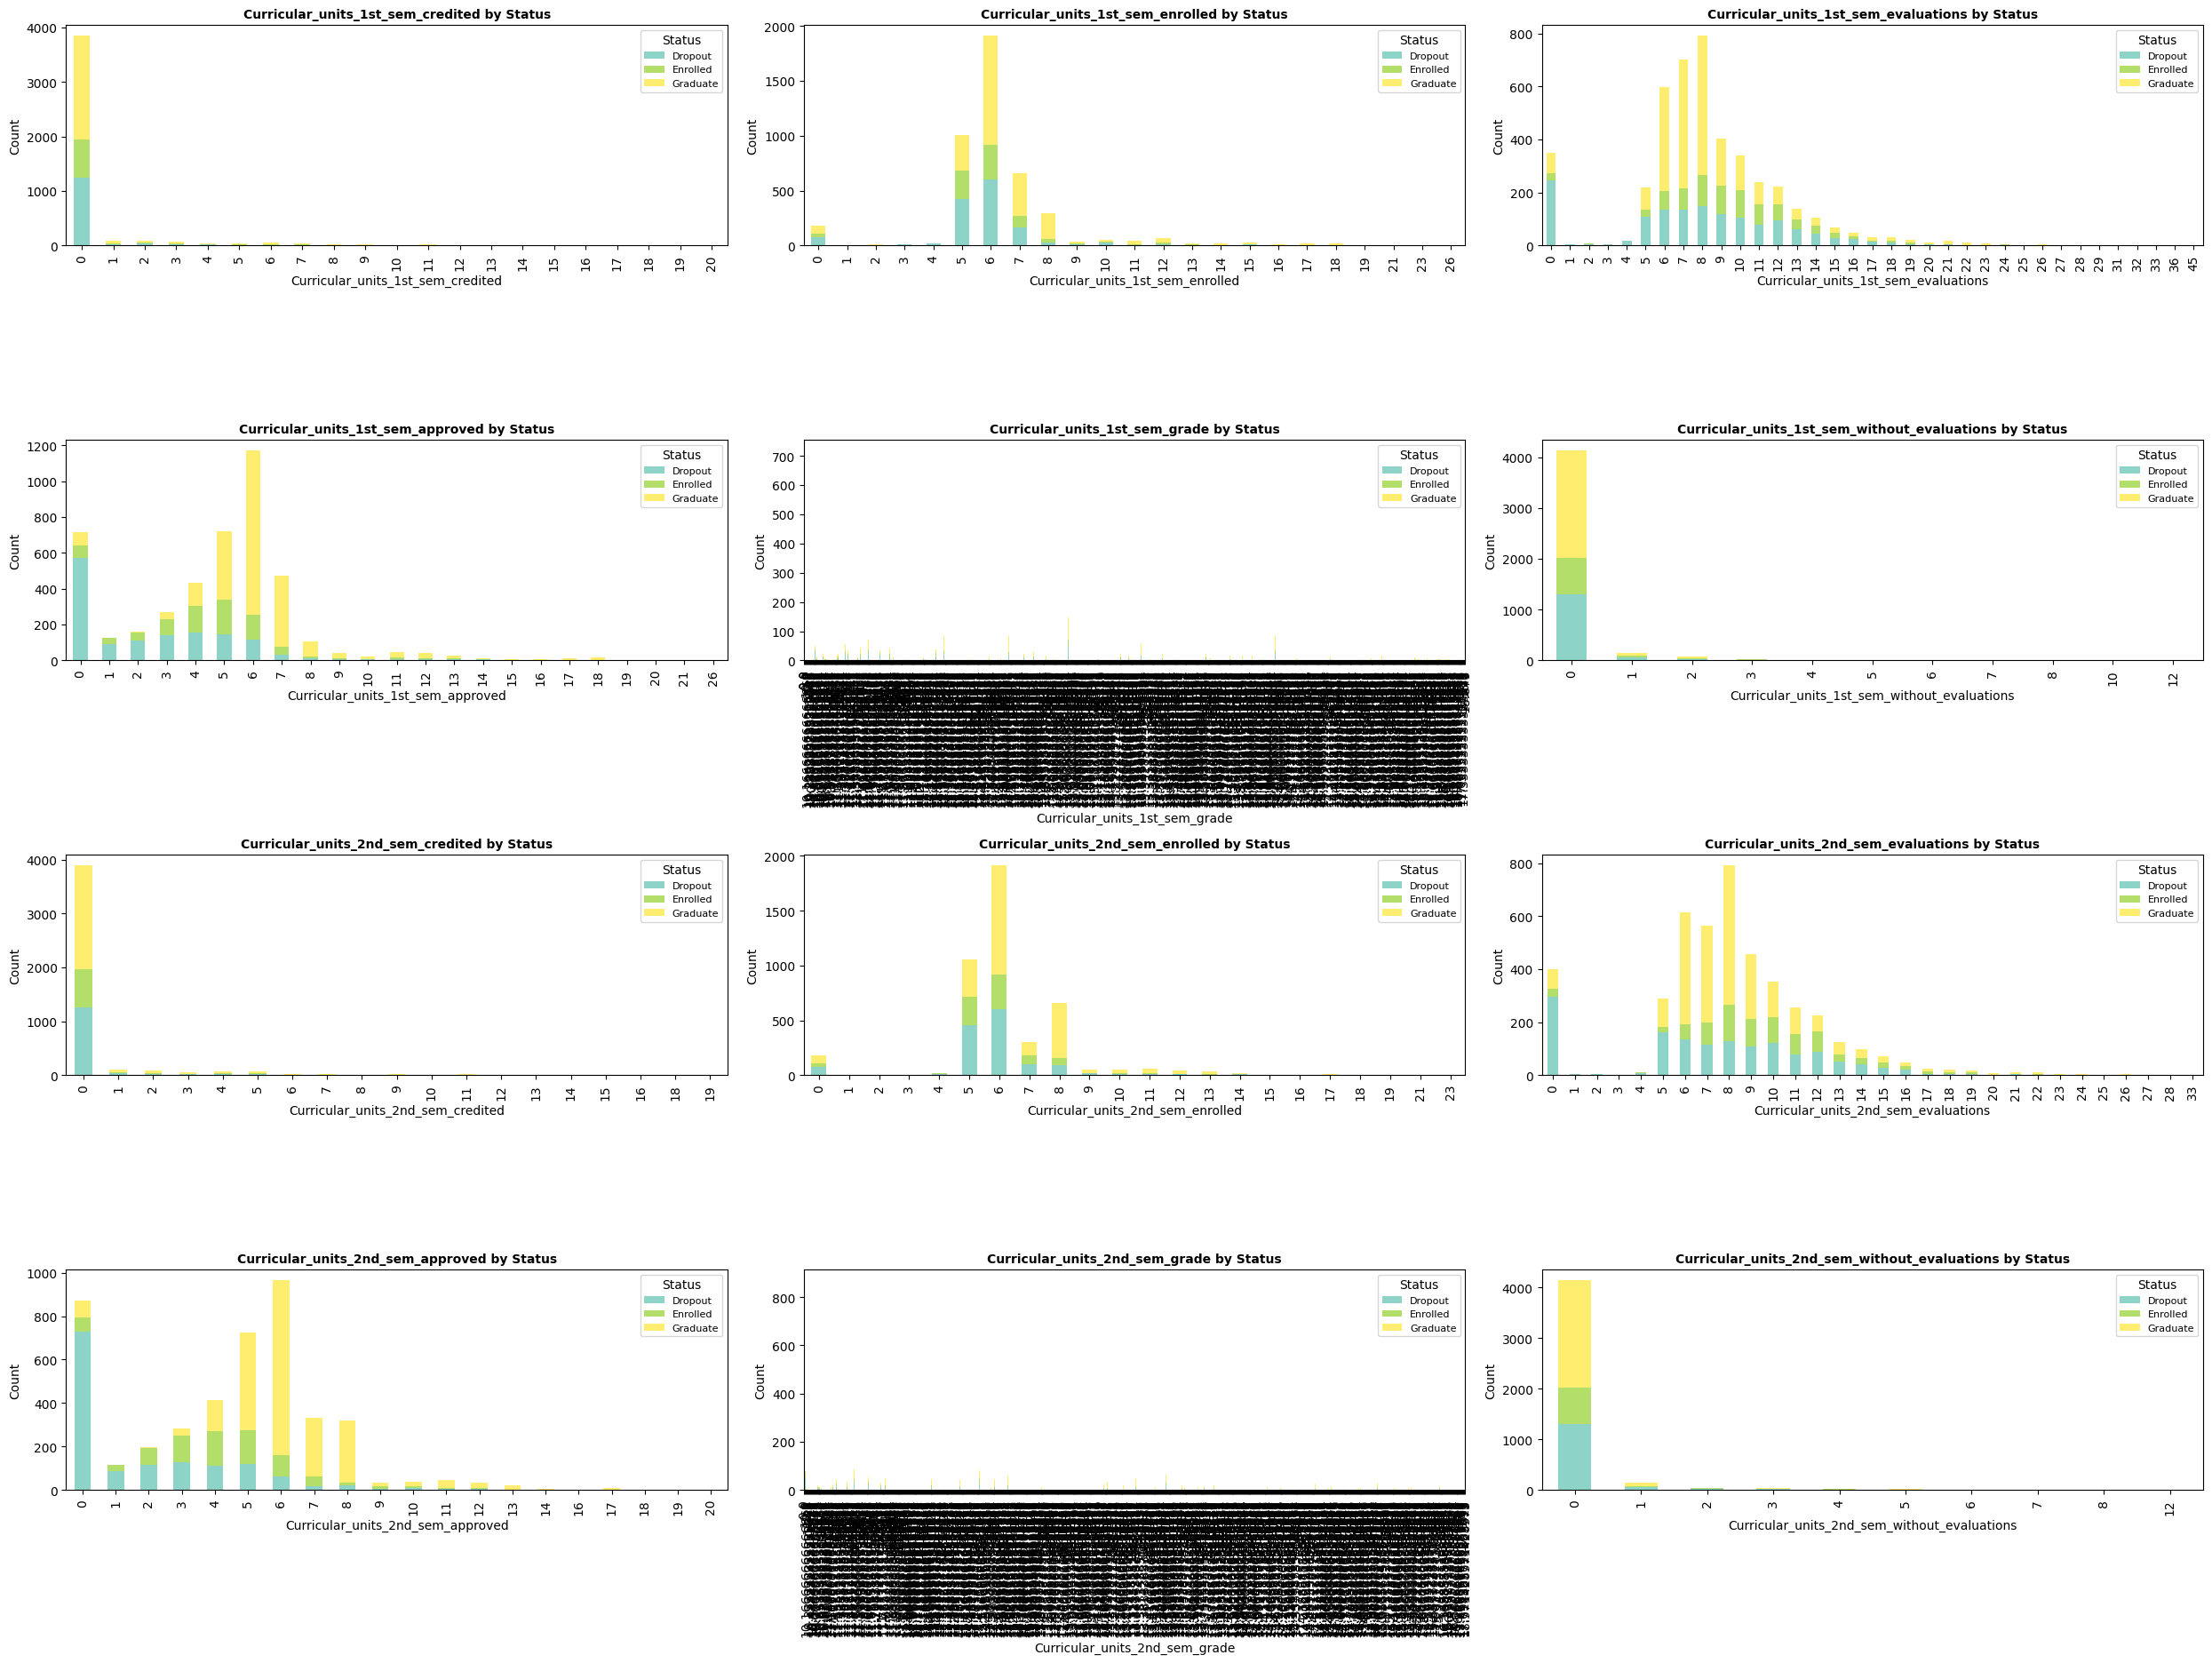

In [50]:
# Pilih fitur yang ingin divisualisasikan
features = ['Curricular_units_1st_sem_credited','Curricular_units_1st_sem_enrolled','Curricular_units_1st_sem_evaluations','Curricular_units_1st_sem_approved',
            'Curricular_units_1st_sem_grade','Curricular_units_1st_sem_without_evaluations','Curricular_units_2nd_sem_credited','Curricular_units_2nd_sem_enrolled',
            'Curricular_units_2nd_sem_evaluations','Curricular_units_2nd_sem_approved','Curricular_units_2nd_sem_grade','Curricular_units_2nd_sem_without_evaluations',]

# Tentukan jumlah baris dan kolom
nrows = 10
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 45))  # Lebih besar agar lebih jelas
axes = axes.flatten()  # Flatten supaya lebih mudah diakses

# Loop setiap fitur dan buat plot
for i, feature in enumerate(features):
    ax = axes[i]
    crosstab = pd.crosstab(data[feature], data['Status'])  # Buat tabel pivot

    crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='Set3')

    ax.set_title(f'{feature} by Status', fontsize=10, fontweight='bold')
    ax.set_ylabel('Count')
    ax.set_xlabel(feature)
    ax.legend(title='Status', fontsize=8)

# Hapus subplot kosong jika fitur tidak habis dalam grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Analysis Correlation Feature

In [51]:
#  Using Lable encoding
le = LabelEncoder()
df_encoded = data.apply(le.fit_transform)
df_encoded.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,0,7,5,1,1,0,28,0,12,9,...,0,0,0,0,0,0,3,5,6,0
1,0,5,1,10,1,0,78,0,0,2,...,0,6,6,6,461,0,7,1,5,2
2,0,0,5,4,1,0,28,0,21,26,...,0,6,0,0,0,0,3,5,6,0
3,0,7,2,14,1,0,28,0,22,26,...,0,6,10,5,185,0,2,0,1,2
4,1,11,1,2,0,0,4,0,21,27,...,0,6,6,6,311,0,7,1,5,2


In [52]:
df_encoded.shape

(4424, 37)

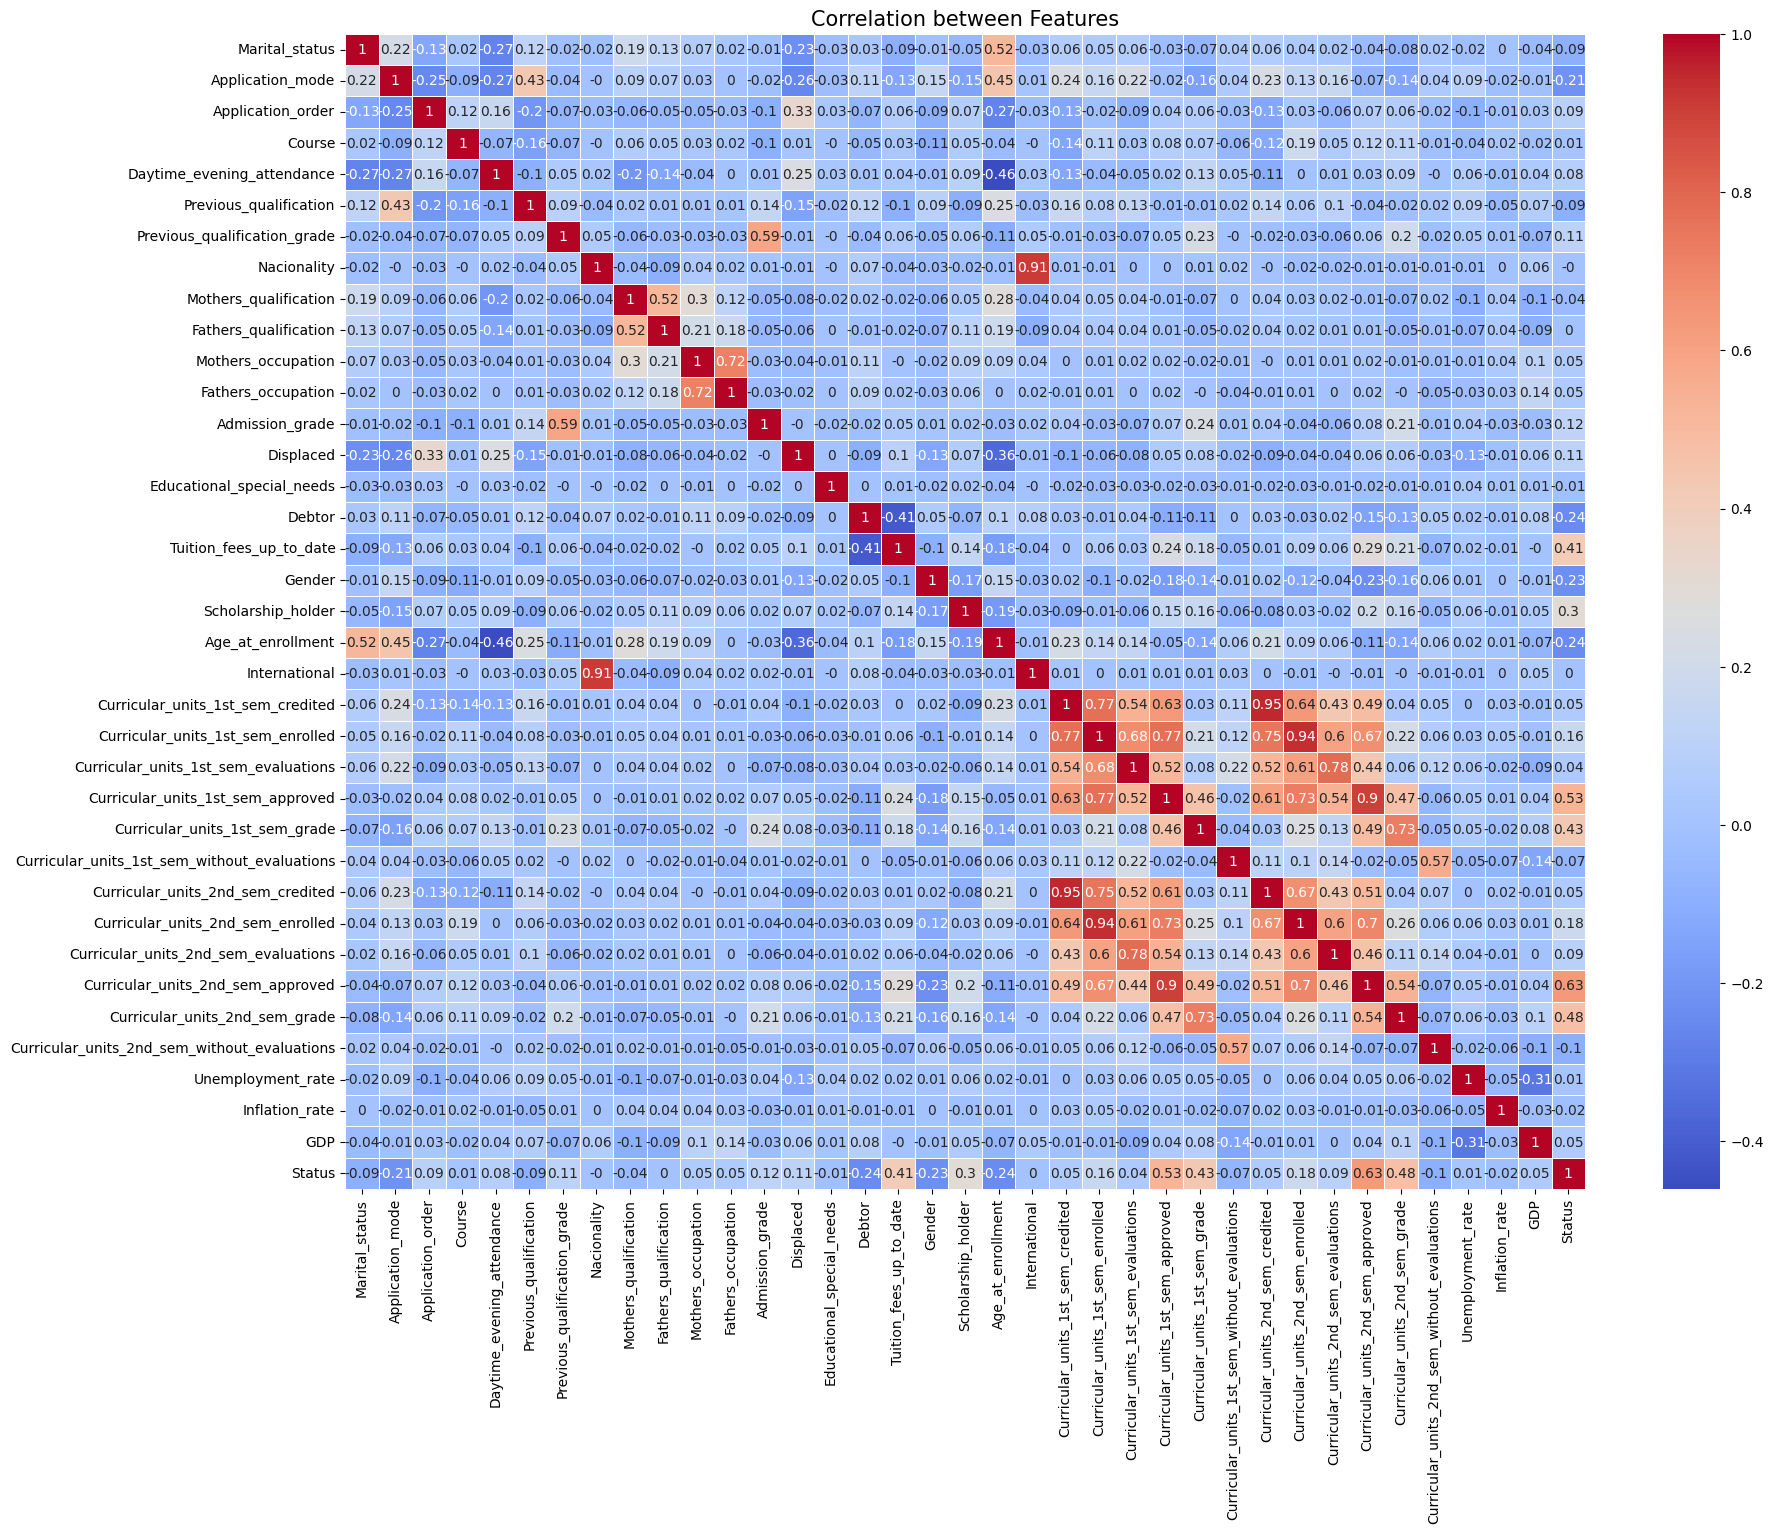

In [53]:
# Memetakan korelasi antar fitur menggunakan heatmap
# Filter kolom numerik
numeric_data = df_encoded.select_dtypes(include=['number'])

corelation = numeric_data.corr().round(2)

plt.figure(figsize=(20,15))
sns.heatmap(corelation, annot=True, linewidths=0.5, cmap='coolwarm')
plt.title('Correlation between Features', fontsize=15)
plt.show()

Factors  correlated with Status:
Curricular_units_2nd_sem_approved               0.626710
Curricular_units_1st_sem_approved               0.529819
Curricular_units_2nd_sem_grade                  0.477999
Curricular_units_1st_sem_grade                  0.434385
Tuition_fees_up_to_date                         0.409827
Scholarship_holder                              0.297595
Curricular_units_2nd_sem_enrolled               0.176010
Curricular_units_1st_sem_enrolled               0.156263
Admission_grade                                 0.122636
Displaced                                       0.113986
Previous_qualification_grade                    0.108102
Curricular_units_2nd_sem_evaluations            0.092632
Application_order                               0.090008
Daytime_evening_attendance                      0.075107
Curricular_units_2nd_sem_credited               0.053849
GDP                                             0.053834
Fathers_occupation                              0.05170

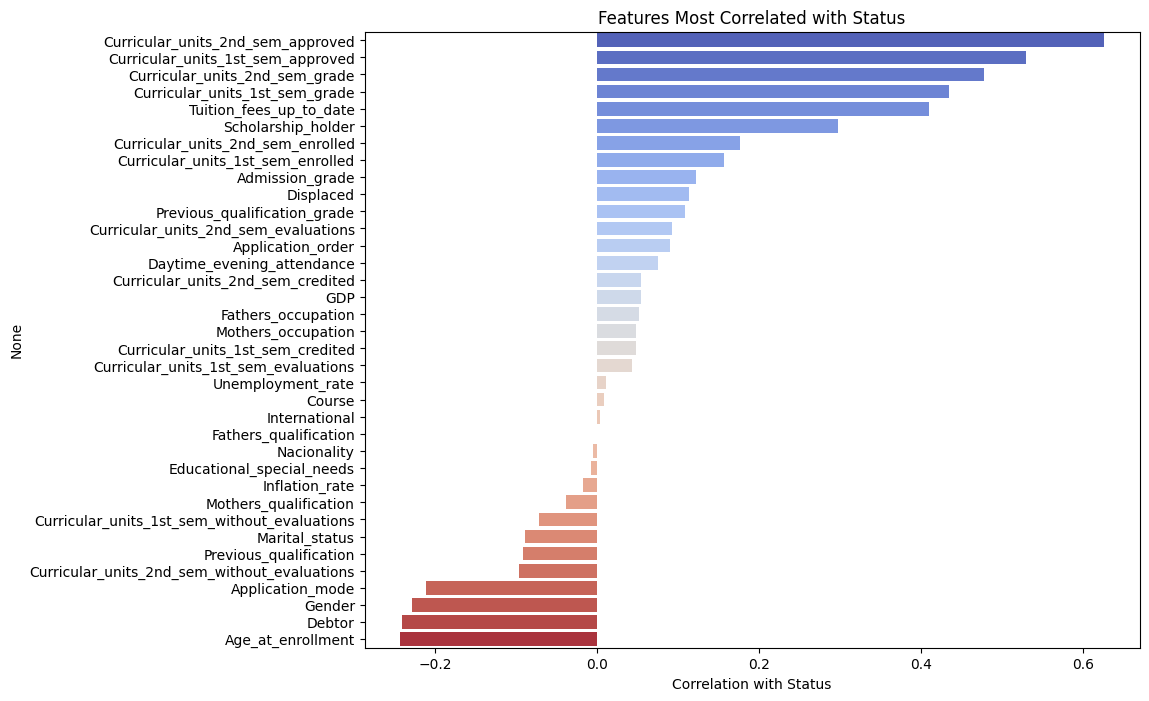

In [54]:
categorical_columns = df_encoded.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encoding untuk fitur kategorikal
df_encoded_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=True)

# Membuat matriks korelasi untuk seluruh fitur (numerik dan kategorikal yang telah dienkode)
correlation_matrix = df_encoded_encoded.corr()

# Ambil korelasi dengan kolom 'Status'
status_correlation = correlation_matrix["Status"].sort_values(ascending=False)

factors = status_correlation
factors = factors.drop('Status')

print("Factors  correlated with Status:")
print(factors)

# Plot the top 10 correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=factors.values, y=factors.index, hue=factors.index, dodge=False, palette="coolwarm", legend=False)
plt.title("Features Most Correlated with Status")
plt.xlabel("Correlation with Status")
plt.show()

## Data Preparation / Preprocessing

In [55]:
df_encoded.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [56]:
# Misalkan kita punya dataset df_encoded dengan fitur X dan target y
# X = df_encoded.drop(columns=['Status'])  # Fitur
X = df_encoded[['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_1st_sem_enrolled', 'Admission_grade', 'Displaced']]
y = df_encoded['Status']  # Target

In [57]:
# melakukan pembagian data X dan y dengan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state=42)
print(f'Total jumlah sample pada dataset: {len(X)}')
print(f'Total jumlah sample pada train dataset: {len(X_train)}')
print(f'Total jumlah sample pada test dataset: {len(X_test)}')

Total jumlah sample pada dataset: 4424
Total jumlah sample pada train dataset: 3539
Total jumlah sample pada test dataset: 885


In [58]:
# mengatasi outlier fungsi LocalOutlierFactor
lof = LocalOutlierFactor().fit_predict(X_train)
mask = lof != -1
X_train, y_train = X_train[mask, :], y_train[mask]

### Melakukan Standarisasi pada Fitur

In [59]:
data_scaler = data[['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_1st_sem_enrolled', 'Admission_grade', 'Displaced']]


In [60]:
# Standardisasi fitur numerik
scaler = StandardScaler()
data_scaler = scaler.fit_transform(data_scaler)

In [61]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [62]:
# melakukan standarisasi dengan fungsi StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

In [63]:
knn = KNeighborsClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)

### KNN

==== KNN Classifier ====
Confusion Matrix:
[[230  33  53]
 [ 42  42  67]
 [ 15  29 374]]
Accuracy: 0.7299
Precision: 0.7126
Recall: 0.7299
F1-Score: 0.7160

----------------------------------------



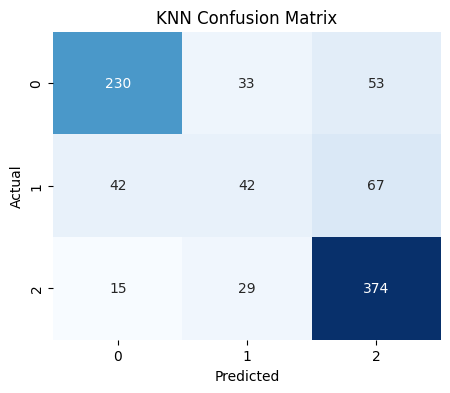

In [64]:
# K-Nearest Neighbors (KNN)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Print the confusion matrix
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)

# Calculate overall metrics (suitable for multi-class)
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted') # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred_knn, average='weighted')       # Use 'weighted' for multi-class
f1 = f1_score(y_test, y_pred_knn, average='weighted')             # Use 'weighted' for multi-class

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest

==== Random Forest Classifier ====
Confusion Matrix:
[[235  37  44]
 [ 37  49  65]
 [ 14  23 381]]
Accuracy: 0.7514
Precision: 0.7373
Recall: 0.7514
F1-Score: 0.7395

----------------------------------------



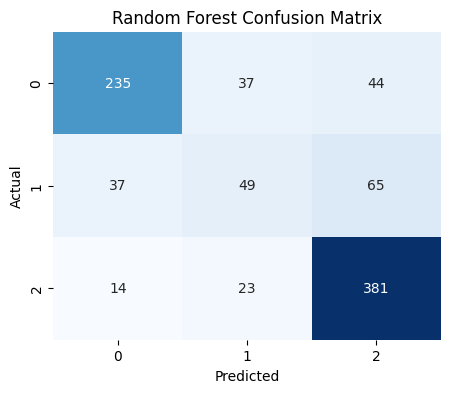

In [65]:
# Random Forest
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Print the confusion matrix
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)

# Calculate overall metrics (suitable for multi-class)
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred_rf, average='weighted')      # Use 'weighted' for multi-class
f1 = f1_score(y_test, y_pred_rf, average='weighted')            # Use 'weighted' for multi-class

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\n" + "-" * 40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### SVC

==== SVM Classifier ====
Confusion Matrix:
[[216  45  55]
 [ 26  46  79]
 [  8  16 394]]
Accuracy: 0.7412
Precision: 0.7343
Recall: 0.7412
F1-Score: 0.7268

----------------------------------------



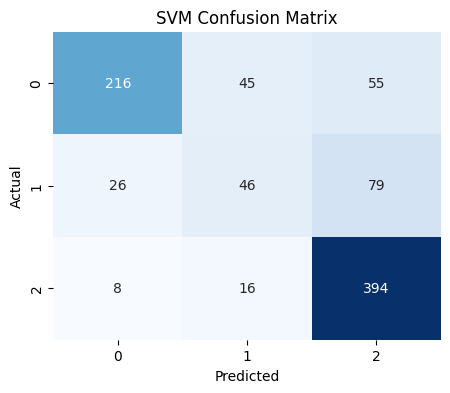

In [66]:
# Support Vector Machine (SVM)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Print the confusion matrix
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)

# Calculate overall metrics (suitable for multi-class)
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred_svm, average='weighted')      # Use 'weighted' for multi-class
f1 = f1_score(y_test, y_pred_svm, average='weighted')            # Use 'weighted' for multi-class

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\n" + "-" * 40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Evaluation

In [67]:
# Function to evaluate and return results as a dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    # tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'Accuracy': round(accuracy_score(y_test, y_pred) * 100, 2),
        'Precision': round(precision_score(y_test, y_pred, average='weighted') * 100, 2),
        'Recall': round(recall_score(y_test, y_pred, average='weighted') * 100, 2),
        'F1-Score': round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
    }
    return results

# Evaluate each model and collect results
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test)
}

# Create a DataFrame to summarize results
summary_df = pd.DataFrame(columns=['Model', 'Accuracy %', 'Precision %', 'Recall %', 'F1-Score %'])

# Populate the DataFrame with results
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Convert list of dictionaries to DataFrame
summary_df = pd.DataFrame(rows)
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors (KNN),72.99,71.26,72.99,71.60
1,Random Forest (RF),75.14,73.73,75.14,73.95
2,Support Vector Machine (SVM),74.12,73.43,74.12,72.68


Penjelasan:

Hasil evaluasi diatas menunjukkan bahwa algoritma yang memiliki tingkat performa teratas yaitu Random Forest dengan akurasi 75,14%. Akurasi yang dihasilkan pada pemodelan ini masih belum akurat dikarenakan tingkat akurasi di bawah 80%

**Kesimpulan**
* Random Forest (RF) memiliki akurasi paling tinggi diantara 3 model diatas (75,14%).
* Disusul oleh Support Vector Machine (SVM) dengan (74.12%).
* K-Nearest Neighbors (KNN) memiliki akurasi terendah (72.99%) di antara semua model.

Rekomendasi: Random Forest (RF) pilihan terbaik jika hanya mempertimbangkan akurasi.

In [68]:
# Simpan model Random Forest
joblib.dump(rf, 'student_rf_model.pkl')

['student_rf_model.pkl']

In [69]:
# with open('status_student_rf_model.pkl', 'wb') as file:
#     pickle.dump(rf, file)